## Put the directory of the package you want to analyze below: 


In [1]:
import os

# Create the "architecture details" folder in the current directory
current_dir = os.getcwd()
details_folder = os.path.join(current_dir, "architecture details")
os.makedirs(details_folder, exist_ok=True)

root_dir = r"C:\Users\kinla\Documents\All_github_repo\IC24Iteration1"
package = "huggingface"
full_dir = os.path.join(root_dir, package)

## 1. Print directory tree

In [2]:
import os

def print_tree(directory, indent=''):
    files = os.listdir(directory)
    files.sort()  # Sort files alphabetically

    tree_string = ""  # Variable to store the tree string

    for file in files:
        path = os.path.join(directory, file)
        if os.path.isfile(path):
            # Append file name with proper indentation to the tree string
            tree_string += f"{indent}|-- {file}\n"
        elif os.path.isdir(path):
            # Append directory name with proper indentation to the tree string
            tree_string += f"{indent}|-- {file}/\n"
            tree_string += print_tree(path, indent + "|   ")

    return tree_string

# Generate the tree string
tree_string = print_tree(full_dir)

# Save the tree string to a text file within the "architecture details" folder
output_file = os.path.join(details_folder, "tree_output.txt")
with open(output_file, "w") as file:
    file.write(tree_string)

# Print the tree string
print(tree_string)

|-- .git
|-- .gitattributes
|-- .venv/
|   |-- Include/
|   |-- Lib/
|   |   |-- site-packages/
|   |   |   |-- GitPython-3.1.40.dist-info/
|   |   |   |   |-- AUTHORS
|   |   |   |   |-- INSTALLER
|   |   |   |   |-- LICENSE
|   |   |   |   |-- METADATA
|   |   |   |   |-- RECORD
|   |   |   |   |-- WHEEL
|   |   |   |   |-- top_level.txt
|   |   |   |-- Jinja2-3.1.2.dist-info/
|   |   |   |   |-- INSTALLER
|   |   |   |   |-- LICENSE.rst
|   |   |   |   |-- METADATA
|   |   |   |   |-- RECORD
|   |   |   |   |-- WHEEL
|   |   |   |   |-- entry_points.txt
|   |   |   |   |-- top_level.txt
|   |   |   |-- MarkupSafe-2.1.3.dist-info/
|   |   |   |   |-- INSTALLER
|   |   |   |   |-- LICENSE.rst
|   |   |   |   |-- METADATA
|   |   |   |   |-- RECORD
|   |   |   |   |-- WHEEL
|   |   |   |   |-- top_level.txt
|   |   |   |-- PIL/
|   |   |   |   |-- BdfFontFile.py
|   |   |   |   |-- BlpImagePlugin.py
|   |   |   |   |-- BmpImagePlugin.py
|   |   |   |   |-- BufrStubImagePlugin.py
|   | 

#### Installation

- Install `graphviz`. Verify the installation by `dot -V` in the command prompt. 
- `pip install pydeps`

Syntax: 
- `pydeps .`: For all python script, generate dependency JSON and export it as SVG. 
- `pydeps xxx.py`: Generate dependency graph for a specific file. 

How `ptdeps` works: 
- `pydeps` only work on the directory that contain the package. 


In [3]:
import os
import subprocess
import shutil
from IPython.display import SVG, display

# Change directory
os.chdir(full_dir)

# Execute command
command = 'pydeps . --show-dot'
dot_file = subprocess.check_output(command, shell=True, text=True)

# Print the dot file
print(dot_file)

svg_file = os.path.join(full_dir, f'{package}.svg')
destination = os.path.join(details_folder, f'{package}.svg')
shutil.move(svg_file, destination)

# Display the SVG image
display(SVG(filename=destination))


digraph G {
    concentrate = true;

    rankdir = TB;
    node [style=filled,fillcolor="#ffffff",fontcolor="#000000",fontname=Helvetica,fontsize=10];

}




In [4]:
# print graph from dot file

import graphviz

graph = graphviz.Source(dot_file)
rendered_graph = graph.render(format='png')
display(graph)

## A dependency graph (as svg) will pop out 

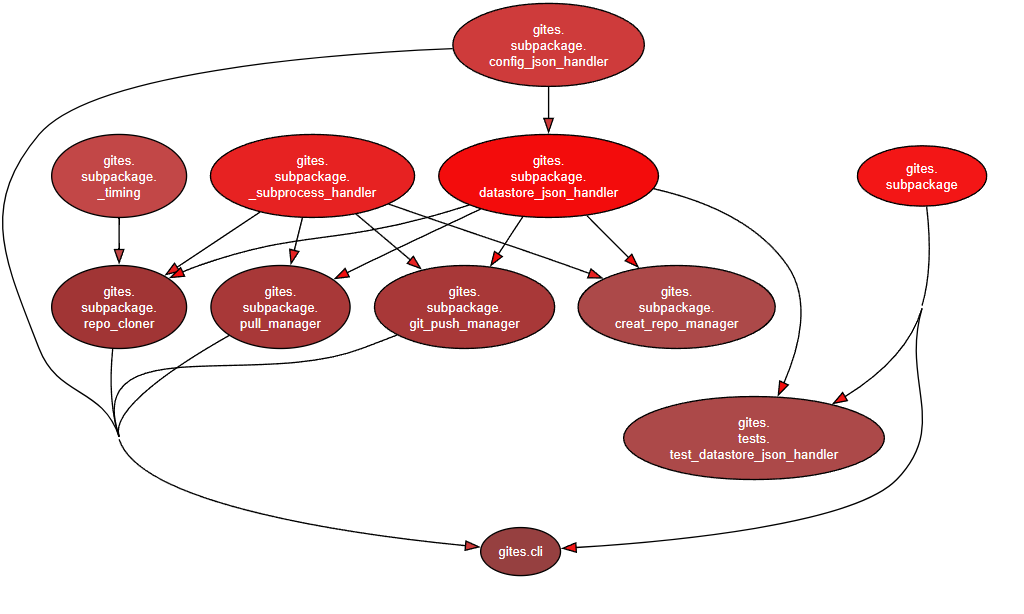

## Advanced dependency graph (Catch the dot file)

`pygraphviz`
- You need `Microsoft Visual C++ 14.0 or greater version` for this installation. 
- `pygraphviz` contains C++ extensions need to be compiled. 

Download VC++ Build tools, and install the following package (approximate 6GB):
- MSVC v142 - VS 2022 C++ x64/x86 build tool
- Windows 11 SDK
- C++ CMake tools for Windows

It can cause a lot of problem even in the stage of setting up `pygraphviz`. I do not recommend people doing this. 

## 3. UML Class and Package diagram 

In [5]:
import os
import subprocess
from subprocess import CalledProcessError
from IPython.display import Image, display

output_directory = details_folder

command = [
    "pyreverse",
    package,
    "-p", package,
    "-A",
    "-S",
    "-o", "png",
    "-d", output_directory  # New argument for specifying the output directory
]


try:
    # Execute the command using subprocess
    result = subprocess.run(command, cwd=full_dir, check=True)
except CalledProcessError as e:
    print(f"An error occurred while running pyreverse: {e}")
else:
    # Assuming the command was successful, display the images
    class_diagram_path = os.path.join(details_folder, f'classes_{package}.png')
    package_diagram_path = os.path.join(details_folder, f'packages_{package}.png')
    
    try:
        print("Class Diagram")
        display(Image(filename=class_diagram_path))
        print("Package Diagram")
        display(Image(filename=package_diagram_path))
    except FileNotFoundError as e:
        print(f"An error occurred while loading the diagrams: {e}")


An error occurred while running pyreverse: Command '['pyreverse', 'huggingface', '-p', 'huggingface', '-A', '-S', '-o', 'png', '-d', 'c:\\Users\\kinla\\Documents\\All_github_repo\\software_engineering_toolbox\\1. Package structure, Dependency, UML diagrams\\architecture details']' returned non-zero exit status 1.


## If we want to obtain the text file, we can use this script instead:

In [6]:
import os
import subprocess
from subprocess import CalledProcessError

def print_file_content(file_path):
    """
    Prints the content of the file at the given file path.
    """
    if os.path.exists(file_path):
        with open(file_path, 'r') as f:
            file_content = f.read()
            print(f"File content ({file_path}):")
            print(file_content)
    else:
        print(f"The file does not exist: {file_path}")

command = [
    "pyreverse",
    package,
    "-p", package,
    "-A",
    "-S",
    "-o", "puml",
    "-d", output_directory  # New argument for specifying the output directory
]

try:
    # Execute the command using subprocess
    subprocess.run(command, cwd=full_dir, check=True)
except CalledProcessError as e:
    print(f"An error occurred while running pyreverse: {e}")
else:
    # Assuming the command was successful, construct the file paths
    class_puml_file_path = os.path.join(details_folder, f'classes_{package}.puml')
    packages_puml_file_path = os.path.join(details_folder, f'packages_{package}.puml')

    # Print the content of class_puml_file_path
    print_file_content(class_puml_file_path)

    # Print the content of packages_puml_file_path
    print_file_content(packages_puml_file_path)

An error occurred while running pyreverse: Command '['pyreverse', 'huggingface', '-p', 'huggingface', '-A', '-S', '-o', 'puml', '-d', 'c:\\Users\\kinla\\Documents\\All_github_repo\\software_engineering_toolbox\\1. Package structure, Dependency, UML diagrams\\architecture details']' returned non-zero exit status 1.
